# Analyzing NYPD Historical Crime Data: Impact on academic performance 


## Abstract 

This is a breakdown of every criminal complaint report filed in NYC by the NYPD in 2011. This data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning. Each record represents a criminal complaint in NYC and includes information abot the type of crime, the location and time of enforcement. This data can be used by the public to explore the nature of criminal activity in conjunction with the Safety/Respect Scores and SAT performance. 

## Methods 

This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2017). For additional details, please see the [data dictionary](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i). 

I preprocessed the data and selected only the variables of my interest and saved the file as NYPD_Complaint_Data_Historic_2011.csv.

# ETL

In [1]:
#Libraries used for analysis and visualizations 

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.express as px
import seaborn as sns 
import folium
from folium.plugins import HeatMap
from random import sample 
import branca.colormap as cm


In [2]:
crime_2011 = pd.read_csv('schools/NYPD_Complaint_Data_Historic (2).csv', index_col = 'CMPLNT_NUM')
crime_2011.head()

,CMPLNT_FR_DT,RPT_DT,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,SUSP_RACE,Latitude,Longitude,Lat_Lon,PATROL_BORO
CMPLNT_NUM,,,,,,,,,,,,,
519234712,1/1/2011,1/21/2019,SEX CRIMES,SEXUAL ABUSE,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,WHITE HISPANIC,40.648650,-73.950336,"(40.648650085000035, -73.95033556299995)",PATROL BORO BKLYN SOUTH
911408185,1/1/2011,5/2/2019,SEX CRIMES,SEXUAL ABUSE,FELONY,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,BLACK HISPANIC,40.736698,-73.983316,"(40.736698070000045, -73.98331602599995)",PATROL BORO MAN SOUTH
635371398,1/1/2011,5/16/2019,RAPE,RAPE 1,FELONY,QUEENS,INSIDE,RESIDENCE-HOUSE,WHITE HISPANIC,40.743080,-73.954736,"(40.74308016800006, -73.95473646099998)",PATROL BORO QUEENS NORTH
135845916,1/1/2011,5/24/2019,RAPE,RAPE 1,FELONY,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,BLACK HISPANIC,40.726554,-73.987828,"(40.72655401900005, -73.98782842699995)",PATROL BORO MAN SOUTH
452808801,1/1/2011,5/28/2019,RAPE,RAPE 1,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,WHITE,40.630367,-73.973713,"(40.63036654500007, -73.97371261299998)",PATROL BORO BKLYN SOUTH


In [3]:
crime_2011.isnull().sum()

CMPLNT_FR_DT             0
RPT_DT                   0
OFNS_DESC              369
PD_DESC                315
LAW_CAT_CD               0
BORO_NM                317
LOC_OF_OCCUR_DESC    24917
PREM_TYP_DESC          722
SUSP_RACE                0
Latitude                26
Longitude               26
Lat_Lon                 26
PATROL_BORO            315
dtype: int64

A significant portion of the CMPLNT_TO_DT has NaN values. Based on the dictionary description, we can exclude it since it has no influence on our analysis. We are not interested in VIC_AGE_GROUP either 


In [4]:
crime_2011.dtypes

CMPLNT_FR_DT          object
RPT_DT                object
OFNS_DESC             object
PD_DESC               object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
SUSP_RACE             object
Latitude             float64
Longitude            float64
Lat_Lon               object
PATROL_BORO           object
dtype: object

In [5]:
# Keeping all rows with Borough Names 
crime_df = crime_2011[crime_2011['LOC_OF_OCCUR_DESC'].notna()]

crime_df.head()

,CMPLNT_FR_DT,RPT_DT,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,SUSP_RACE,Latitude,Longitude,Lat_Lon,PATROL_BORO
CMPLNT_NUM,,,,,,,,,,,,,
519234712,1/1/2011,1/21/2019,SEX CRIMES,SEXUAL ABUSE,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,WHITE HISPANIC,40.648650,-73.950336,"(40.648650085000035, -73.95033556299995)",PATROL BORO BKLYN SOUTH
911408185,1/1/2011,5/2/2019,SEX CRIMES,SEXUAL ABUSE,FELONY,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,BLACK HISPANIC,40.736698,-73.983316,"(40.736698070000045, -73.98331602599995)",PATROL BORO MAN SOUTH
635371398,1/1/2011,5/16/2019,RAPE,RAPE 1,FELONY,QUEENS,INSIDE,RESIDENCE-HOUSE,WHITE HISPANIC,40.743080,-73.954736,"(40.74308016800006, -73.95473646099998)",PATROL BORO QUEENS NORTH
135845916,1/1/2011,5/24/2019,RAPE,RAPE 1,FELONY,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,BLACK HISPANIC,40.726554,-73.987828,"(40.72655401900005, -73.98782842699995)",PATROL BORO MAN SOUTH
452808801,1/1/2011,5/28/2019,RAPE,RAPE 1,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,WHITE,40.630367,-73.973713,"(40.63036654500007, -73.97371261299998)",PATROL BORO BKLYN SOUTH


In [9]:
crime_df= crime_df[['CMPLNT_FR_DT', 'OFNS_DESC','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','SUSP_RACE', 'LAW_CAT_CD', 'BORO_NM','Latitude','Longitude', 'PATROL_BORO']]

df_clean =  crime_df[crime_df['Latitude'].notna() & crime_df['Longitude'].notna() & crime_df['OFNS_DESC']]
df_clean.isnull().sum()
crime_cleaned = df_clean.rename({'CMPLNT_FR_DT':'Date of Complaint',
                                'OFNS_DESC': 'Offense Desc.',
                                 'LOC_OF_OCCUR_DESC': 'Location of Incident',
                                 'PREM_TYP_DESC': 'Premise Type',
                                 'SUSP_RACE': 'Suspect Race',
                                 'BORO_NM':'Borough',
                                'LAW_CAT_CD':'Crime Classification',
                                'PATROL_BORO': 'Patrol Borough'}, axis =1)

crime_cleaned.head()

,Date of Complaint,Offense Desc.,Location of Incident,Premise Type,Suspect Race,Crime Classification,Borough,Latitude,Longitude,Patrol Borough
CMPLNT_NUM,,,,,,,,,,
519234712,1/1/2011,SEX CRIMES,INSIDE,RESIDENCE - APT. HOUSE,WHITE HISPANIC,FELONY,BROOKLYN,40.648650,-73.950336,PATROL BORO BKLYN SOUTH
911408185,1/1/2011,SEX CRIMES,INSIDE,RESIDENCE - APT. HOUSE,BLACK HISPANIC,FELONY,MANHATTAN,40.736698,-73.983316,PATROL BORO MAN SOUTH
635371398,1/1/2011,RAPE,INSIDE,RESIDENCE-HOUSE,WHITE HISPANIC,FELONY,QUEENS,40.743080,-73.954736,PATROL BORO QUEENS NORTH
135845916,1/1/2011,RAPE,INSIDE,RESIDENCE - APT. HOUSE,BLACK HISPANIC,FELONY,MANHATTAN,40.726554,-73.987828,PATROL BORO MAN SOUTH
452808801,1/1/2011,RAPE,INSIDE,RESIDENCE - APT. HOUSE,WHITE,FELONY,BROOKLYN,40.630367,-73.973713,PATROL BORO BKLYN SOUTH


In [10]:
date = crime_cleaned['Date of Complaint'].str.split("/", n=3, expand = True)

crime_cleaned['Day'] = date[1].astype(int)
crime_cleaned['Month'] = date[0].astype(int)


In [19]:
crime_cleaned['Suspect Race'] = crime_cleaned['Suspect Race'].str.split(" ").apply(lambda x:x[0])
crime_cleaned.head()

,Date of Complaint,Offense Desc.,Location of Incident,Premise Type,Suspect Race,Crime Classification,Borough,Latitude,Longitude,Patrol Borough,Day,Month,race
CMPLNT_NUM,,,,,,,,,,,,,
519234712,1/1/2011,SEX CRIMES,INSIDE,RESIDENCE - APT. HOUSE,WHITE,FELONY,BROOKLYN,40.648650,-73.950336,PATROL BORO BKLYN SOUTH,1,1,WHITE
911408185,1/1/2011,SEX CRIMES,INSIDE,RESIDENCE - APT. HOUSE,BLACK,FELONY,MANHATTAN,40.736698,-73.983316,PATROL BORO MAN SOUTH,1,1,BLACK
635371398,1/1/2011,RAPE,INSIDE,RESIDENCE-HOUSE,WHITE,FELONY,QUEENS,40.743080,-73.954736,PATROL BORO QUEENS NORTH,1,1,WHITE
135845916,1/1/2011,RAPE,INSIDE,RESIDENCE - APT. HOUSE,BLACK,FELONY,MANHATTAN,40.726554,-73.987828,PATROL BORO MAN SOUTH,1,1,BLACK
452808801,1/1/2011,RAPE,INSIDE,RESIDENCE - APT. HOUSE,WHITE,FELONY,BROOKLYN,40.630367,-73.973713,PATROL BORO BKLYN SOUTH,1,1,WHITE


In [20]:
crime_cleaned.drop(['race'], axis =1 )

,Date of Complaint,Offense Desc.,Location of Incident,Premise Type,Suspect Race,Crime Classification,Borough,Latitude,Longitude,Patrol Borough,Day,Month
CMPLNT_NUM,,,,,,,,,,,,
519234712,1/1/2011,SEX CRIMES,INSIDE,RESIDENCE - APT. HOUSE,WHITE,FELONY,BROOKLYN,40.648650,-73.950336,PATROL BORO BKLYN SOUTH,1,1
911408185,1/1/2011,SEX CRIMES,INSIDE,RESIDENCE - APT. HOUSE,BLACK,FELONY,MANHATTAN,40.736698,-73.983316,PATROL BORO MAN SOUTH,1,1
635371398,1/1/2011,RAPE,INSIDE,RESIDENCE-HOUSE,WHITE,FELONY,QUEENS,40.743080,-73.954736,PATROL BORO QUEENS NORTH,1,1
135845916,1/1/2011,RAPE,INSIDE,RESIDENCE - APT. HOUSE,BLACK,FELONY,MANHATTAN,40.726554,-73.987828,PATROL BORO MAN SOUTH,1,1
452808801,1/1/2011,RAPE,INSIDE,RESIDENCE - APT. HOUSE,WHITE,FELONY,BROOKLYN,40.630367,-73.973713,PATROL BORO BKLYN SOUTH,1,1
891318795,1/1/2011,SEX CRIMES,INSIDE,RESIDENCE - APT. HOUSE,WHITE,FELONY,BRONX,40.837324,-73.919831,PATROL BORO BRONX,1,1
870718841,1/1/2011,RAPE,INSIDE,RESIDENCE - APT. HOUSE,BLACK,FELONY,BROOKLYN,40.697964,-73.918083,PATROL BORO BKLYN NORTH,1,1
570428250,1/1/2011,SEX CRIMES,INSIDE,RESIDENCE - APT. HOUSE,BLACK,FELONY,BROOKLYN,40.630367,-73.973713,PATROL BORO BKLYN SOUTH,1,1
169756661,1/1/2011,SEX CRIMES,INSIDE,RESIDENCE - PUBLIC HOUSING,WHITE,FELONY,MANHATTAN,40.815732,-73.945420,PATROL BORO MAN NORTH,1,1


In [40]:
crime_cleaned.dtypes

Date of Complaint        object
Offense Desc.            object
Location of Incident     object
Premise Type             object
Suspect Race             object
Crime Classification     object
Borough                  object
Latitude                float64
Longitude               float64
Patrol Borough           object
Day                       int32
Month                     int32
race                     object
dtype: object

In [78]:

months = {1:'Jan', 2:'Feb',3:'Mar',4:'Apr', 5: 'May',6: 'Jun', 7:'Jul', 8: 'Aug',9: 'Sep', 10:'Oct', 11: 'Nov', 12: 'Dec'}
crime_cleaned['Month'] = crime_cleaned['Month'].replace(months)

crime_cleaned.head()

,Date of Complaint,Offense Desc.,Location of Incident,Premise Type,Suspect Race,Crime Classification,Borough,Latitude,Longitude,Patrol Borough,Day,Month,race
CMPLNT_NUM,,,,,,,,,,,,,
519234712,1/1/2011,SEX CRIMES,INSIDE,RESIDENCE - APT. HOUSE,WHITE,FELONY,BROOKLYN,40.648650,-73.950336,PATROL BORO BKLYN SOUTH,1,Jan,WHITE
911408185,1/1/2011,SEX CRIMES,INSIDE,RESIDENCE - APT. HOUSE,BLACK,FELONY,MANHATTAN,40.736698,-73.983316,PATROL BORO MAN SOUTH,1,Jan,BLACK
635371398,1/1/2011,RAPE,INSIDE,RESIDENCE-HOUSE,WHITE,FELONY,QUEENS,40.743080,-73.954736,PATROL BORO QUEENS NORTH,1,Jan,WHITE
135845916,1/1/2011,RAPE,INSIDE,RESIDENCE - APT. HOUSE,BLACK,FELONY,MANHATTAN,40.726554,-73.987828,PATROL BORO MAN SOUTH,1,Jan,BLACK
452808801,1/1/2011,RAPE,INSIDE,RESIDENCE - APT. HOUSE,WHITE,FELONY,BROOKLYN,40.630367,-73.973713,PATROL BORO BKLYN SOUTH,1,Jan,WHITE


In [83]:
crime_cleaned = crime_cleaned[crime_cleaned['Borough'].notna()]
crime_cleaned = crime_cleaned[crime_cleaned['Premise Type'].notna()]
crime_cleaned.isnull().sum()

Date of Complaint       0
Offense Desc.           0
Location of Incident    0
Premise Type            0
Suspect Race            0
Crime Classification    0
Borough                 0
Latitude                0
Longitude               0
Patrol Borough          0
Day                     0
Month                   0
race                    0
dtype: int64

# Data Exploration

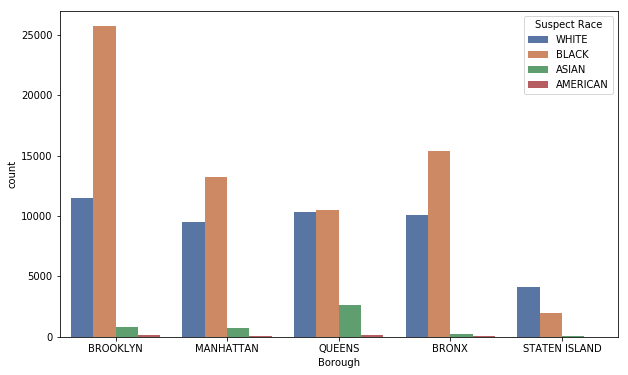

In [35]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'Borough', hue  = 'Suspect Race', data=crime_cleaned, palette = 'deep')

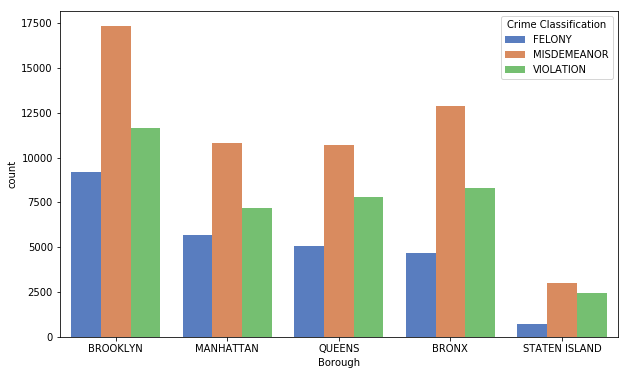

In [37]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'Borough', hue  = 'Crime Classification', data=crime_cleaned, palette = 'muted')

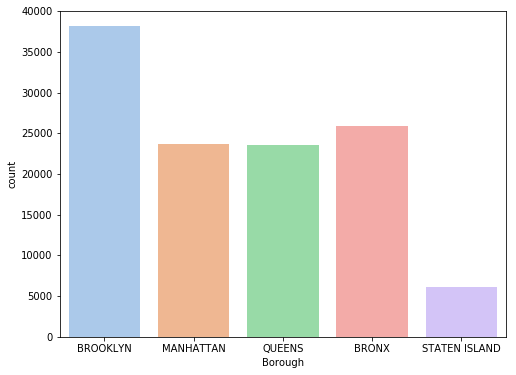

In [22]:
f, ax = plt.subplots(figsize=(8,6))

sns.countplot(x = 'Borough', data=crime_cleaned, palette = 'pastel')

Text(0.5, 1.0, 'Number of Complaints per Month')

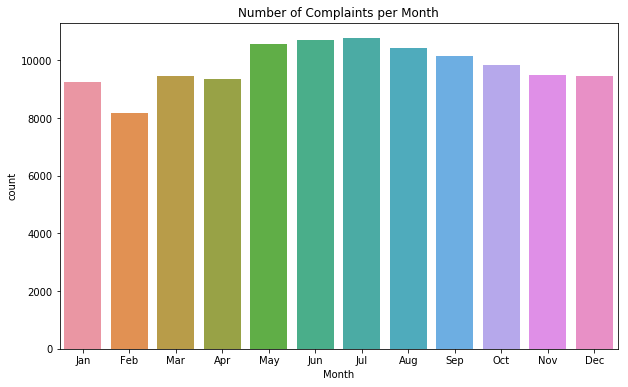

In [53]:
f, ax = plt.subplots(figsize=(10,6))

sns.countplot(x='Month', data =crime_cleaned).set_title('Number of Complaints per Month')




In [71]:
boro = crime_cleaned['Borough'].value_counts()
boro.rename_axis('Borough')

boro

Borough
BROOKLYN         38153
BRONX            25848
MANHATTAN        23663
QUEENS           23572
STATEN ISLAND     6159
Name: Borough, dtype: int64

In [89]:


# property = crime_cleaned['Premise Type'].value_counts()
# property
a = crime_cleaned[crime_cleaned['Premise Type']== 'PUBLIC SCHOOL']
a


,Date of Complaint,Offense Desc.,Location of Incident,Premise Type,Suspect Race,Crime Classification,Borough,Latitude,Longitude,Patrol Borough,Day,Month,race
CMPLNT_NUM,,,,,,,,,,,,,
763040237,1/1/2011,OFF. AGNST PUB ORD SENSBLTY &,INSIDE,PUBLIC SCHOOL,BLACK,MISDEMEANOR,BROOKLYN,40.696920,-73.910677,PATROL BORO BKLYN NORTH,1,Jan,BLACK
160895274,1/1/2011,HARRASSMENT 2,INSIDE,PUBLIC SCHOOL,BLACK,VIOLATION,BRONX,40.863828,-73.836057,PATROL BORO BRONX,1,Jan,BLACK
259543193,1/1/2011,HARRASSMENT 2,INSIDE,PUBLIC SCHOOL,BLACK,VIOLATION,BRONX,40.887644,-73.852103,PATROL BORO BRONX,1,Jan,BLACK
510950626,1/1/2011,OFF. AGNST PUB ORD SENSBLTY &,INSIDE,PUBLIC SCHOOL,BLACK,MISDEMEANOR,BROOKLYN,40.649469,-73.958483,PATROL BORO BKLYN SOUTH,1,Jan,BLACK
572871349,1/3/2011,OFF. AGNST PUB ORD SENSBLTY &,FRONT OF,PUBLIC SCHOOL,WHITE,MISDEMEANOR,BRONX,40.833427,-73.902649,PATROL BORO BRONX,3,Jan,WHITE
667140418,1/3/2011,OFF. AGNST PUB ORD SENSBLTY &,INSIDE,PUBLIC SCHOOL,WHITE,MISDEMEANOR,MANHATTAN,40.732372,-73.982862,PATROL BORO MAN SOUTH,3,Jan,WHITE
113989964,1/3/2011,ASSAULT 3 & RELATED OFFENSES,FRONT OF,PUBLIC SCHOOL,BLACK,MISDEMEANOR,BROOKLYN,40.688488,-73.976848,PATROL BORO BKLYN NORTH,3,Jan,BLACK
924953057,1/3/2011,PETIT LARCENY,INSIDE,PUBLIC SCHOOL,BLACK,MISDEMEANOR,MANHATTAN,40.794723,-73.933404,PATROL BORO MAN NORTH,3,Jan,BLACK
278118291,1/3/2011,OFF. AGNST PUB ORD SENSBLTY &,INSIDE,PUBLIC SCHOOL,WHITE,MISDEMEANOR,STATEN ISLAND,40.574041,-74.109308,PATROL BORO STATEN ISLAND,3,Jan,WHITE


In [ ]:
crime_boro = folium.Map(location=[40.75, -73.98],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

five_boros = a.loc[:,['Premise Type','Suspect Race','Crime Classification','Borough','Latitude','Longitude']]

for i in range(len(five_boros)):
    lat = five_boros.iloc[i][4]
    long = five_boros.iloc[i][5]
    popup_text = """Community Index : {}<br>
                Suspect Race: {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(five_boros.index[i],
                               five_boros.iloc[i][1],
                               five_boros.iloc[i][0]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(crime_boro)

In [72]:
# San Francisco latitude and longitude values
latitude = 40.75
longitude = -73.98
nyc_geo = 'Borough Boundaries.geojson'

# Create map
nyc_map = folium.Map(
       location=[latitude,longitude],
       zoom_start=12)

# Use json file  TEST based on class
nyc_map.choropleth(
       geo_data=nyc_geo,
       data=boro,
       name='choropleth',
       columns=['Borough','Count'],
       key_on='feature.properties.BoroName',
       fill_color='YlOrRd',
       fill_opacity='0.7',
       line_opacity='0.2',
       legend_name='Crime Rate in New York City, by Neighborhood')

folium.LayerControl().add_to(nyc_map)
# display the map
nyc_map.save('map.html')

In [55]:
positions = []

positions = list(zip(crime_cleaned['Latitude'], crime_cleaned['Longitude']))
tiles = 'OpenStreetMap'

base_map = folium.Map(location=[40.75,-73.98], zoom_start=10, tiles = tiles)

pos_sample = sample(positions, 50000)
HeatMap(pos_sample, radius =8).add_to(base_map)


colormap = cm.LinearColormap(colors=['lightblue','green', 'yellow', 'red'])
colormap.caption = 'Heat Map of Crime in New York City'
colormap.add_to(base_map)

base_map